<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/TruncatedSVD_Texto_Notebook_Visualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad con TruncatedSVD y datos textuales
Este notebook ilustra el uso de **TruncatedSVD** para reducir la dimensionalidad de una matriz dispersa obtenida mediante representación TF-IDF. El ejercicio se centra en una colección de documentos breves relacionados con ciencia de datos.

## 1. Importación de librerías
Se importan las librerías necesarias para vectorización de texto y aplicación de TruncatedSVD.

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

## 2. Definición de los documentos
Creamos una pequeña colección de documentos que serán transformados en vectores utilizando TF-IDF. Esto simula una situación típica de minería de textos o análisis de contenido.

In [2]:
documentos = [
    "ciencia de datos aplicada a salud pública",
    "estadística y minería de datos para análisis de riesgo",
    "visualización de datos y análisis multivariado",
    "ciencia de datos en energía y medio ambiente"
]

## 3. Representación TF-IDF
Se aplica el vectorizador TF-IDF para obtener una matriz dispersa, en la que las filas representan documentos y las columnas términos, ponderados por su frecuencia relativa en el corpus.

In [3]:
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(documentos)
print("Forma de la matriz TF-IDF:", X.shape)

Forma de la matriz TF-IDF: (4, 17)


## 4. Aplicación de TruncatedSVD
Reducimos la dimensionalidad a 2 componentes. Esto permite proyectar los documentos en un espacio de menor dimensión, capturando los patrones latentes más relevantes del contenido textual.

In [4]:
svd = TruncatedSVD(n_components=2)
X_reducido = svd.fit_transform(X)
print("Componentes reducidos:")
print(X_reducido)

Componentes reducidos:
[[ 0.60030702  0.49870029]
 [ 0.67927591 -0.44176534]
 [ 0.66271695 -0.48427917]
 [ 0.5748318   0.55955025]]


### Interpretación
- Cada fila del resultado representa un documento proyectado en un nuevo espacio bidimensional.
- Las columnas representan **componentes latentes** que combinan los términos originales para describir patrones subyacentes en los textos.
- Aunque los valores no tienen interpretación directa como palabras, documentos con valores similares están relacionados temáticamente.
- Esta técnica puede ser útil en tareas de clasificación, agrupamiento o visualización de contenido textual en grandes volúmenes de datos.

## 5. Visualización en 2D
Se realiza una visualización de los documentos proyectados en el espacio de componentes obtenidos por TruncatedSVD. Cada punto representa un documento y su posición indica similitudes semánticas.

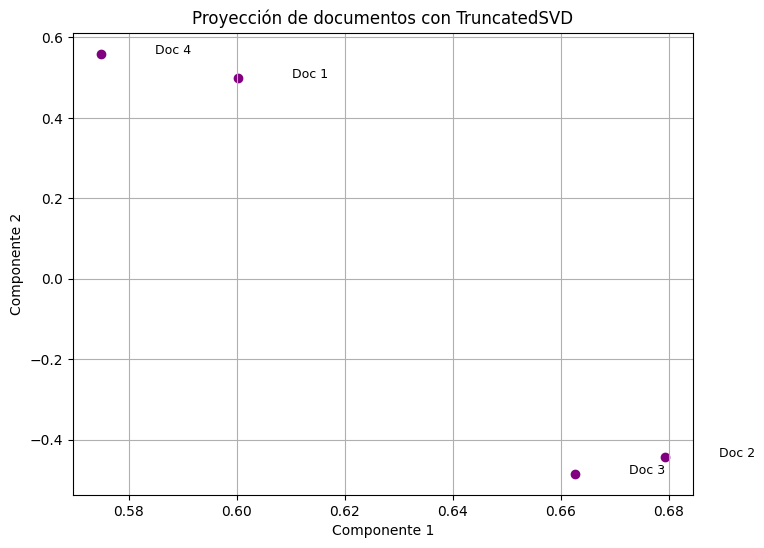

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], color='purple')
for i, texto in enumerate(documentos):
    plt.text(X_reducido[i, 0] + 0.01, X_reducido[i, 1], f'Doc {i+1}', fontsize=9)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección de documentos con TruncatedSVD')
plt.grid(True)
plt.show()

## Conclusiones
- El uso de TruncatedSVD en matrices dispersas permite representar grandes colecciones de texto en espacios de menor dimensión, lo cual es útil para análisis exploratorio, clasificación y agrupamiento.
- La visualización en 2D permite identificar patrones o similitudes entre documentos que pueden no ser evidentes en su forma original.
- En aplicaciones reales de Big Data, esta técnica es fundamental para reducir el costo computacional sin perder la estructura informativa relevante.
- Se recomienda su uso combinado con técnicas de minería de texto, como análisis de temas (topic modeling), detección de duplicados o resumen automático.